In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from SAMPEX_functions import read_counts as read
from SAMPEX_functions import mb_finder, mb_magnitude
import pandas as pd

# reading in electron counts file: day ### of year ####
file = 'hhrr1993127.txt'
t, r1, r2, r3, r4 = read(file)

In [2]:
# find microburst times and N_100, SSD1, SSD4 counts using algorithm
t_microburst, N_100_microburst, r1_microburst, r4_microburst, mb_index, MB_mask, N_100, A_500 = mb_finder(t, r1, r2, r3, r4)

In [3]:
# calculation of B_3 bin percentiles
y_microburst, B_3_microburst, B_3 = mb_magnitude(N_100, N_100_microburst, A_500)

In [4]:
t_microburst

array([51185. , 57002.3, 57002.4, 66703.5, 80165.4, 80166.5, 80166.6,
       80166.9, 80167. , 80167.8, 80168.2, 80171. , 80171.3, 85896.8,
       85900.9, 85904. , 85909.5, 85915.7, 85927.9, 85948.8, 85949.8,
       85950.1, 85951.3, 85951.5, 85951.7, 85952.3, 85952.7, 85953.2,
       85953.3, 85953.7, 85953.8, 85953.9, 85954.8, 85955.4, 85955.5,
       85955.6, 85955.7, 85956. , 85956.4, 85957.1, 85957.4, 85957.6,
       85957.7, 85958. , 85958.4, 85961.6, 85962.7, 85962.8, 85963.2,
       85963.8, 85963.9, 85965. , 85965.1, 85965.3, 85965.8, 85965.9,
       85966. , 85966.3, 85966.5, 85966.6, 85967.4, 85972.2, 85972.3,
       85975.4, 85975.5, 85976.7, 86035.9])

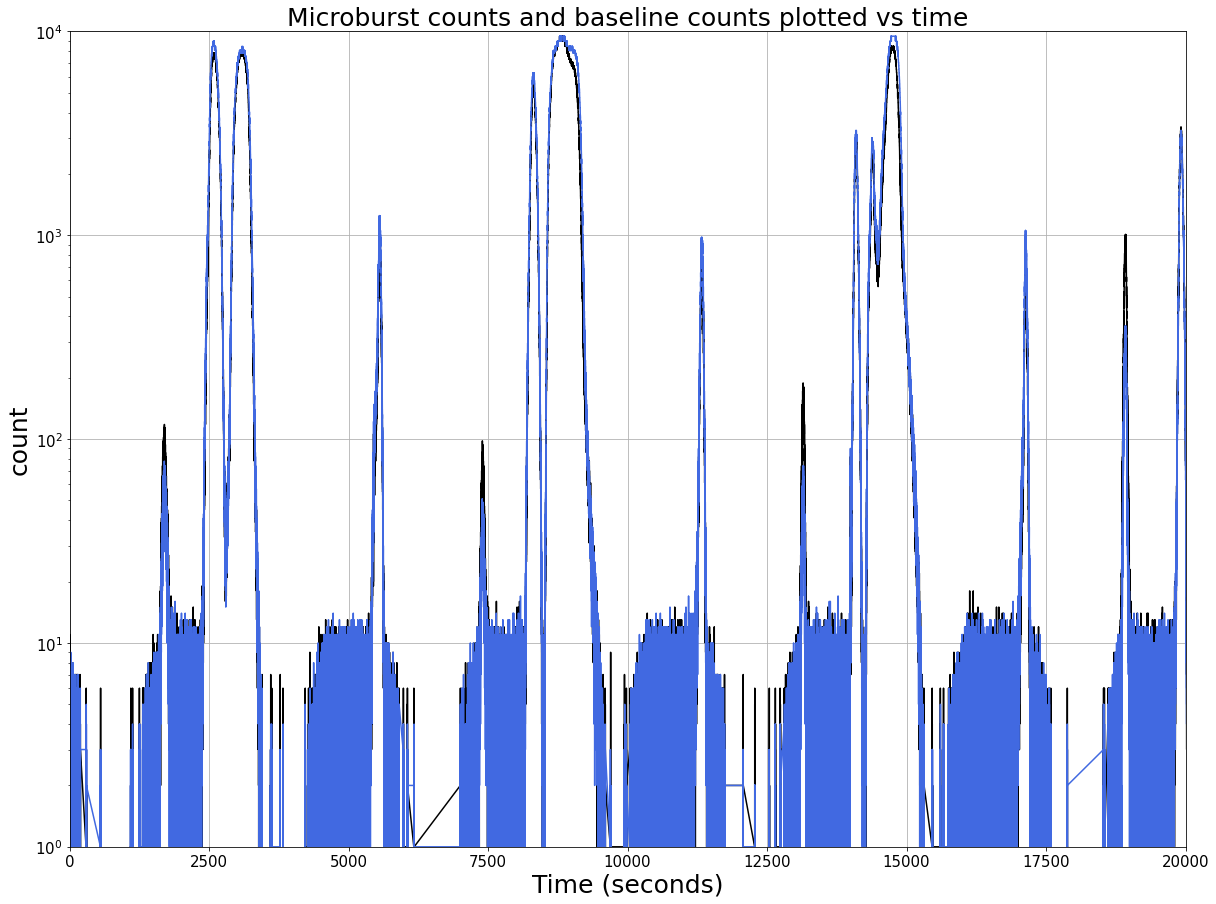

In [15]:
# plot microburst electron counts and baseline vs time
i = 15             # focus microburst
middle_point = t_microburst[i]
plotrange = 500     # data range around microburst

plt.figure(figsize = (20,15))
plt.title('Microburst counts and baseline counts plotted vs time', fontsize = 25)
#plt.semilogy(t, N_100, 'b-', t, B_3, 'k-')
plt.semilogy(t, r1, 'k-', t, r4, 'royalblue')  # isotropy check
plt.xlabel('Time (seconds)', fontsize = 25)
plt.ylabel('count', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
middle_point = 2500
#plt.xlim(middle_point-plotrange, middle_point+plotrange)
plt.xlim(0, 20000)
plt.ylim(1, 10000)
plt.grid(True)
plt.show()

In [6]:
# calculation of the isotropy indices of electron counts
iso_indices = []        # for data analysis purposes
iso_indices_plot = []   # for plotting purposes

for i, ii in zip(r1_microburst, r4_microburst):
    if ii >= 20 and i >= 20:
        if  ii != 0 and ii > i:
            iso_index = i/ii
            iso_indices.append(iso_index)
            iso_indices_plot.append(iso_index)
        elif  i != 0 and i > ii:
            iso_index = ii/i
            iso_indices.append(iso_index)
            iso_indices_plot.append(iso_index)
        elif  ii == i:
            iso_index = 1
            iso_indices.append(iso_index)
            iso_indices_plot.append(iso_index)
    else:
        # when counts are too low, they do not contribute to the isotropy day-average isotropy index
        iso_index = 0
        iso_indices_plot.append(iso_index)

iso_indices = np.array(iso_indices)
iso_indices_plot = np.array(iso_indices_plot)

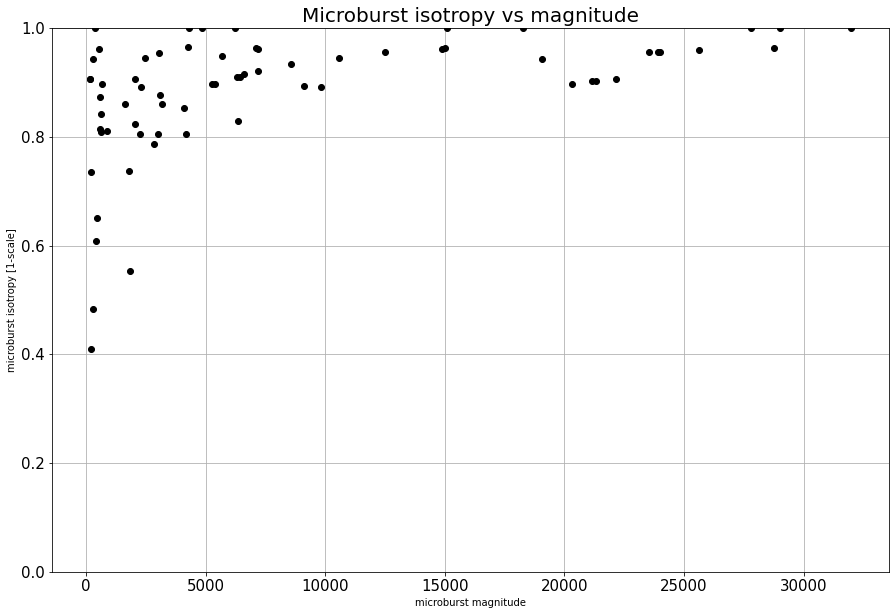

In [7]:
# plot microburst isotropy vs magnitude
i = 400
plotrange = 50000

plt.figure(figsize = (15,10))
plt.title('Microburst isotropy vs magnitude', fontsize = 20)
plt.plot(y_microburst, iso_indices_plot, 'ko')
plt.xlabel('microburst magnitude', fontsize = 10)
plt.ylabel('microburst isotropy [1-scale]', fontsize = 10)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim(0, 1)
#plt.xlim(t_microburst[i]-plotrange, t_microburst[i]+plotrange)
plt.grid(True)
plt.show()

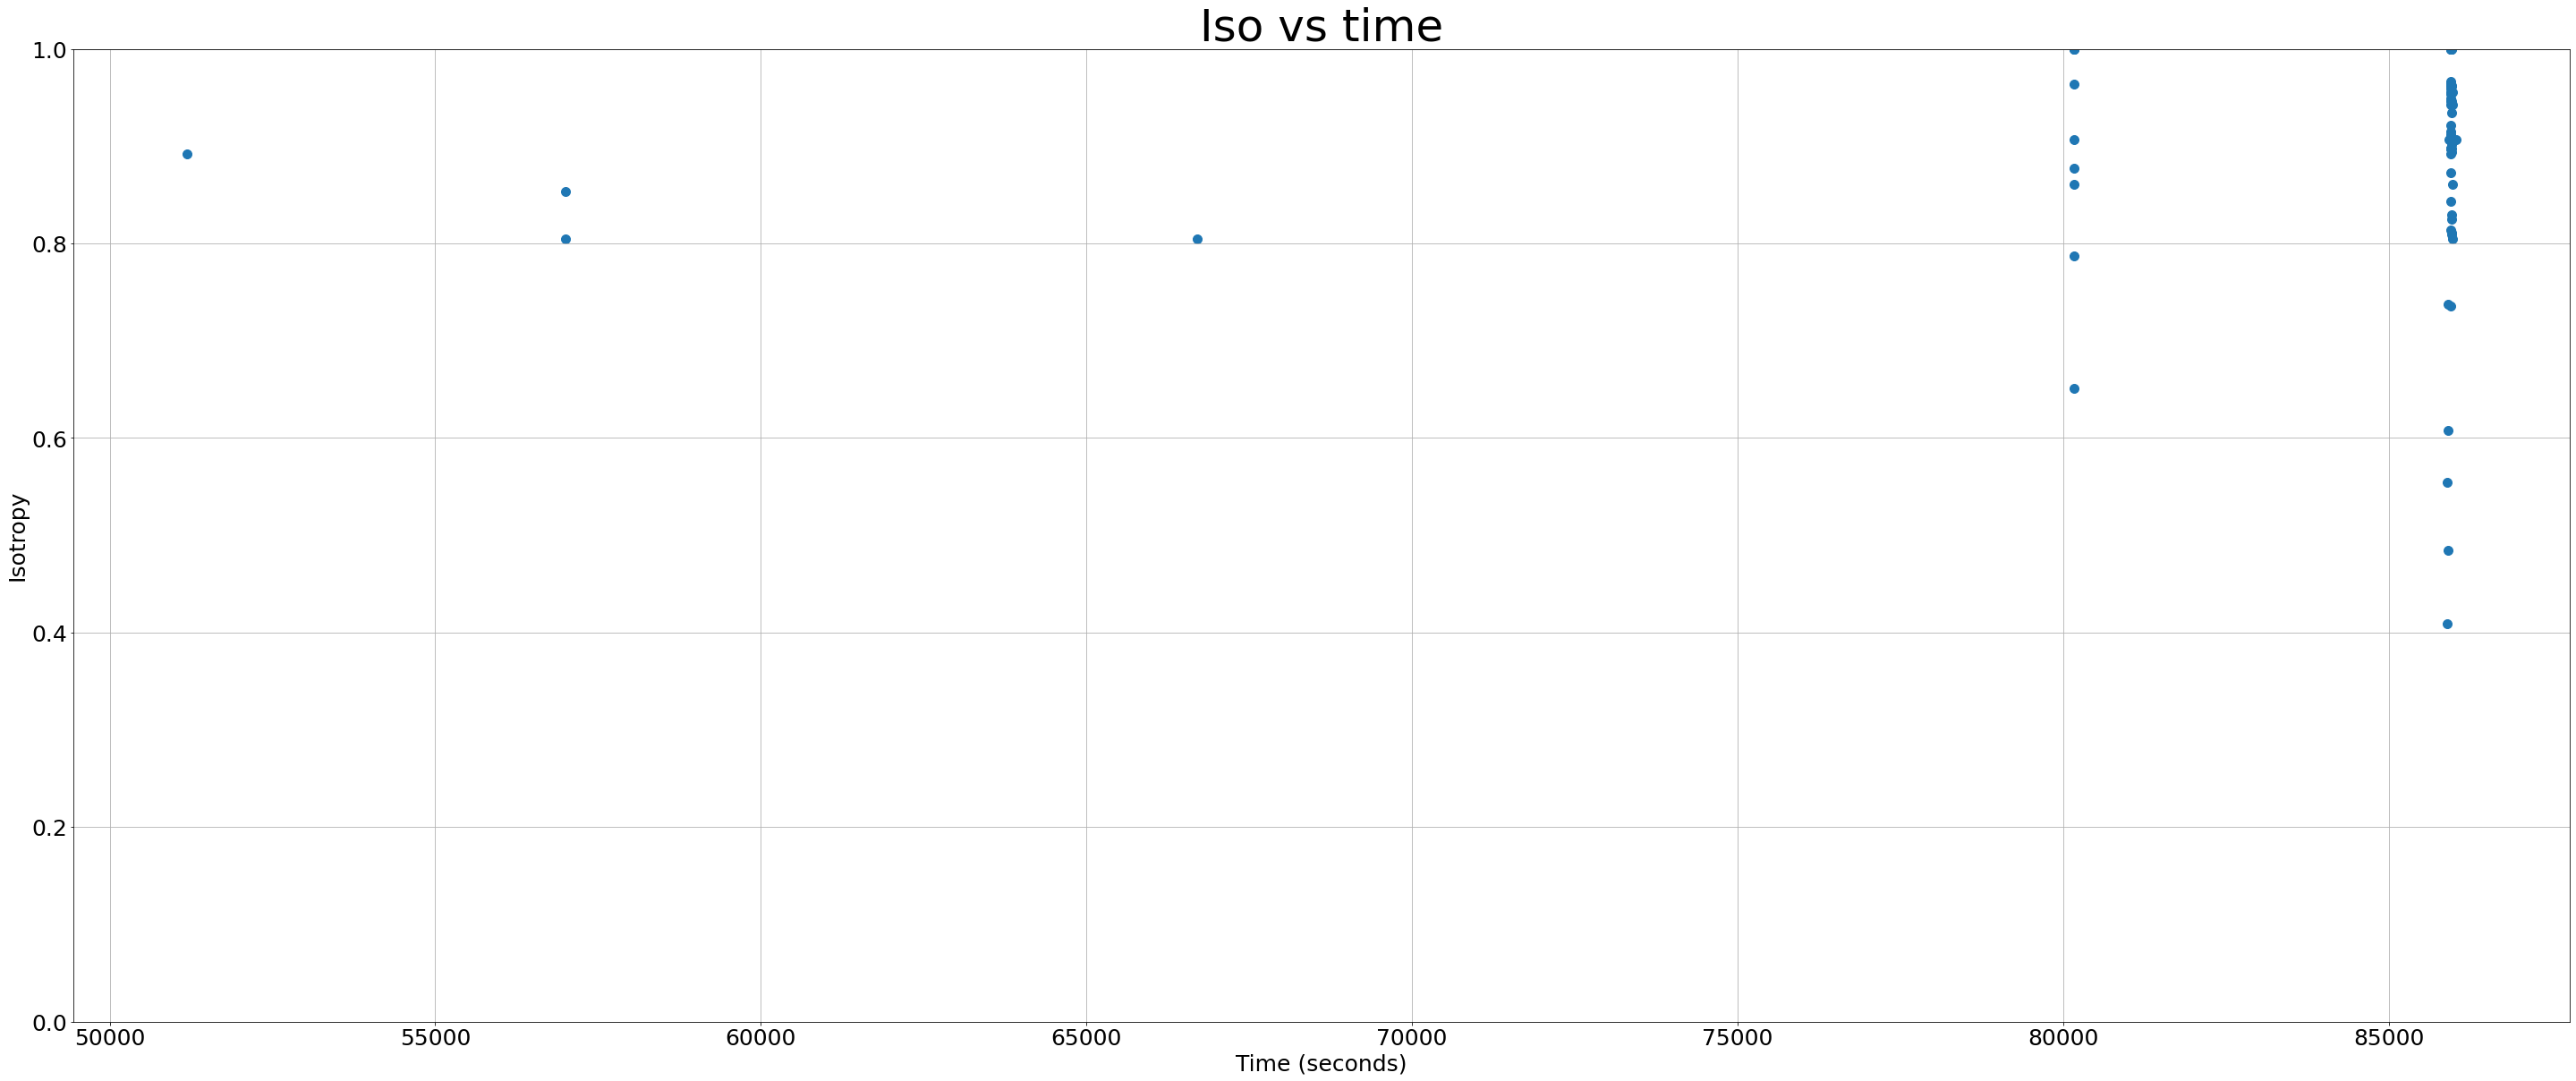

In [8]:
# isotropy plot
plt.figure(figsize = (50,20))
plt.title('Iso vs time', fontsize = 50)
plt.scatter(t_microburst, iso_indices_plot, s = 100)
plt.xlabel('Time (seconds)', fontsize = 25)
plt.ylabel('Isotropy', fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [9]:
mask = iso_indices == 0.5

In [10]:
print(t_microburst[mask])
print(r1_microburst[mask])
print(r4_microburst[mask])

[]
[]
[]


In [11]:
# plot microburst magnitude vs time
#i = 400
#plotrange = 50000

#plt.figure(figsize = (20,15))
#plt.title('Microburst magnitude vs time', fontsize = 25)
#plt.semilogy(t_microburst, y_microburst, 'ko')
#plt.xlabel('Time (seconds)', fontsize = 20)
#plt.ylabel('count', fontsize = 20)
#plt.xticks(fontsize = 15)
#plt.yticks(fontsize = 15)
#plt.xlim(t_microburst[i]-plotrange, t_microburst[i]+plotrange)
#plt.grid(True)
#plt.show()